# Problem Statement

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

Data Analysis and Data Importing

In [4]:
df= pd.read_excel('CompData-1.xlsx')

In [5]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [6]:
df.tail()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
2053,2743,Kothari Ferment.,3.021580e-04,6.490000e+09,0.477066,0.000000,0.183014,0.322063,0.192739,0.022127,...,0.320387,0.004430,0,0.000420,0.624567,0.026791,0.565158,1,0.171662,0
2054,21216,Firstobj.Tech.,1.371450e-04,0.000000e+00,0.465211,0.000658,0.000000,0.319764,0.169391,0.022072,...,0.312324,0.032284,0,0.000882,0.624008,0.024201,0.573670,1,0.053740,0
2055,142,Diamines & Chem.,2.114990e-04,8.370000e+09,0.480248,0.000502,0.000000,0.327828,0.155005,0.021861,...,0.313122,0.040998,0,0.009579,0.623718,0.026702,0.564697,1,0.054984,0
2056,18014,IL&FS Engg.,3.750000e+09,0.000000e+00,0.474670,0.000578,0.306205,0.322027,0.173834,0.022167,...,0.315632,0.020275,0,0.004958,0.623443,0.026943,0.565792,1,0.057553,0
2057,43229,Channel Nine,2.981110e-04,0.000000e+00,0.467203,0.000826,0.000000,0.330021,0.180236,0.022418,...,0.316734,0.031368,0,0.000186,0.623588,0.026871,0.565512,1,0.020266,0


In [7]:
R=df.shape[0]
C=df.shape[1]
print('The total number of rows are',R,'\n''The total number of columns are',C)

The total number of rows are 2058 
The total number of columns are 58


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,2058.0,1.757211e+04,2.189289e+04,4.000000,3.674000e+03,6.240000e+03,2.428075e+04,7.249300e+04
_Operating_Expense_Rate,2058.0,2.052389e+09,3.252624e+09,0.000100,1.578727e-04,3.330330e-04,4.110000e+09,9.980000e+09
_Research_and_development_expense_rate,2058.0,1.208634e+09,2.144568e+09,0.000000,0.000000e+00,1.994130e-04,1.550000e+09,9.980000e+09
_Cash_flow_rate,2058.0,4.652426e-01,2.266269e-02,0.000000,4.600991e-01,4.634450e-01,4.680691e-01,1.000000e+00
_Interest_bearing_debt_interest_rate,2058.0,1.113022e+07,9.042595e+07,0.000000,2.760280e-04,4.540450e-04,6.630660e-04,9.900000e+08
_Tax_rate_A,2058.0,1.147770e-01,1.524457e-01,0.000000,0.000000e+00,3.709890e-02,2.161909e-01,9.996963e-01
_Cash_Flow_Per_Share,1891.0,3.199856e-01,1.529979e-02,0.169449,3.149890e-01,3.206479e-01,3.259178e-01,4.622268e-01
_Per_Share_Net_profit_before_tax_Yuan_,2058.0,1.769673e-01,3.015730e-02,0.000000,1.666039e-01,1.756421e-01,1.858854e-01,7.923477e-01
_Realized_Sales_Gross_Profit_Growth_Rate,2058.0,2.276117e-02,2.170104e-02,0.004282,2.205831e-02,2.210001e-02,2.215200e-02,1.000000e+00
_Operating_Profit_Growth_Rate,2058.0,8.481083e-01,4.589093e-03,0.736430,8.479740e-01,8.480386e-01,8.481147e-01,1.000000e+00


Null Values:

In [10]:
df.isnull().sum()

Co_Code                                                0
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                   

In [11]:
df.size

119364

In [12]:
df.isnull().sum().sum()

298

In [13]:
298/119364

0.00249656512851446

Que: 1.1 Outliers Treatment

In [14]:
df_X = df.drop('Default',axis = 1)
df_Y = df['Default']

In [15]:
df_X

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.576869,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.551523,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.463045,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.577212,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.594038,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2743,Kothari Ferment.,3.021580e-04,6.490000e+09,0.477066,0.000000,0.183014,0.322063,0.192739,0.022127,...,0.599051,0.320387,0.004430,0,0.000420,0.624567,0.026791,0.565158,1,0.171662
2054,21216,Firstobj.Tech.,1.371450e-04,0.000000e+00,0.465211,0.000658,0.000000,0.319764,0.169391,0.022072,...,0.583909,0.312324,0.032284,0,0.000882,0.624008,0.024201,0.573670,1,0.053740
2055,142,Diamines & Chem.,2.114990e-04,8.370000e+09,0.480248,0.000502,0.000000,0.327828,0.155005,0.021861,...,0.646378,0.313122,0.040998,0,0.009579,0.623718,0.026702,0.564697,1,0.054984
2056,18014,IL&FS Engg.,3.750000e+09,0.000000e+00,0.474670,0.000578,0.306205,0.322027,0.173834,0.022167,...,0.614016,0.315632,0.020275,0,0.004958,0.623443,0.026943,0.565792,1,0.057553


In [16]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [17]:
#Outliers in each column
((df_X > UL) | (df_X < LL)).sum() 

Co_Code                                              241
Co_Name                                                0
_Accounts_Receivable_Turnover                        281
_Allocation_rate_per_person                          200
_Average_Collection_Days                              77
_CFO_to_Assets                                       110
_Cash_Flow_Per_Share                                 146
_Cash_Flow_to_Equity                                 306
_Cash_Flow_to_Liability                              407
_Cash_Flow_to_Total_Assets                           317
_Cash_Reinvestment_perc                              220
_Cash_Turnover_Rate                                    0
_Cash_flow_rate                                      206
_Cash_to_Current_Liability                           253
_Cash_to_Total_Assets                                163
_Continuous_Net_Profit_Growth_Rate                   340
_Current_Asset_Turnover_Rate                         464
_Current_Liability_to_Current_A

In [18]:
#Total number of outliers in the data: 
((df_X > UL) | (df_X < LL)).sum().sum()

11105

In [19]:
df_X[((df_X > UL) | (df_X < LL))] = np.nan

In [20]:
df_X.isnull().sum()

Co_Code                                              241
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate               264
_Cash_flow_rate                                      206
_Interest_bearing_debt_interest_rate                  94
_Tax_rate_A                                           42
_Cash_Flow_Per_Share                                 313
_Per_Share_Net_profit_before_tax_Yuan_               186
_Realized_Sales_Gross_Profit_Growth_Rate             283
_Operating_Profit_Growth_Rate                        317
_Continuous_Net_Profit_Growth_Rate                   340
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                               304
_Total_Asset_Return_Growth_Rate_Ratio                226
_Cash_Reinvestment_perc                              220
_Current_Ratio                                       193
_Quick_Ratio                   

In [21]:
#Total number of outliers and null values:
df_X.isnull().sum().sum()

11403

In [22]:
11403 - 298

11105

In [23]:
11403/119364

0.09553131597466573

Removing the columns which are not significant in model building:

In [24]:
df_X = df_X.drop(['Co_Code','Co_Name','_Net_Income_Flag'], axis = 1)

In [25]:
df_X.shape

(2058, 54)

In [26]:
DF = pd.concat([df_X,df_Y],axis =1 )

<AxesSubplot:>

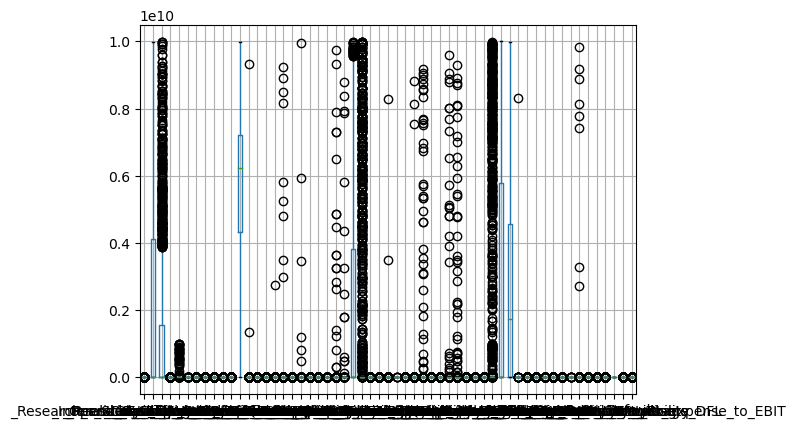

In [27]:
df.boxplot()

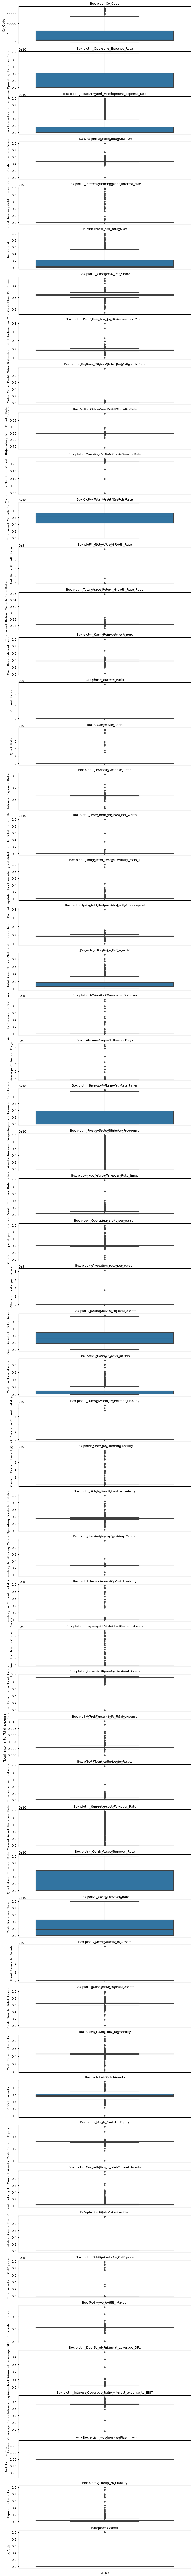

In [28]:
# Checking Outliers in dataset

col_names = list(df.columns)
col_names.remove('Co_Name')
fig, ax = plt.subplots(len(col_names), figsize=(10,150))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [29]:
DF_temp = DF[DF.isnull().sum(axis = 1) <=5]

In [30]:
DF_temp.shape

(1175, 55)

Proportion of Default:

In [31]:
DF_temp['Default'].value_counts()

0    1088
1      87
Name: Default, dtype: int64

In [32]:
DF['Default'].value_counts(normalize= True)

0    0.8931
1    0.1069
Name: Default, dtype: float64

In [33]:
DF.Default.sum() / len(DF.Default)

0.10689990281827016

In [34]:
df['Default'].value_counts()

0    1838
1     220
Name: Default, dtype: int64

In [35]:
df['Default'].value_counts(normalize= True)

0    0.8931
1    0.1069
Name: Default, dtype: float64

In [36]:
df.Default.sum() / len(df.Default)

0.10689990281827016

    Total   Default
    2058   220
    1175    87

In [37]:
87/1175

0.07404255319148936

In [38]:
87/220

0.39545454545454545

In [39]:
DF.isnull().sum().sort_values(ascending = False)/DF.index.size

_Fixed_Assets_Turnover_Frequency                     0.243440
_Current_Asset_Turnover_Rate                         0.225462
_Degree_of_Financial_Leverage_DFL                    0.212828
_Cash_Flow_to_Liability                              0.197765
_No_credit_Interval                                  0.192420
_Interest_Coverage_Ratio_Interest_expense_to_EBIT    0.182702
_Operating_profit_per_person                         0.173469
_Continuous_Net_Profit_Growth_Rate                   0.165209
_Interest_Expense_Ratio                              0.159378
_Cash_Flow_to_Total_Assets                           0.154033
_Operating_Profit_Growth_Rate                        0.154033
_Cash_Flow_Per_Share                                 0.152089
_Cash_Flow_to_Equity                                 0.148688
_Net_Value_Growth_Rate                               0.147716
_Realized_Sales_Gross_Profit_Growth_Rate             0.137512
_Accounts_Receivable_Turnover                        0.136540
_Researc

UNIVARIATE AND BIVARIATE ANALYSIS

<AxesSubplot:xlabel='_Operating_Expense_Rate', ylabel='Count'>

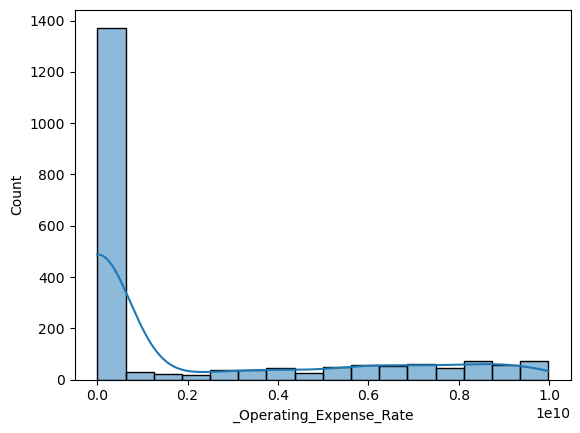

In [40]:
sns.histplot(data=df,x='_Operating_Expense_Rate',kde=True,)


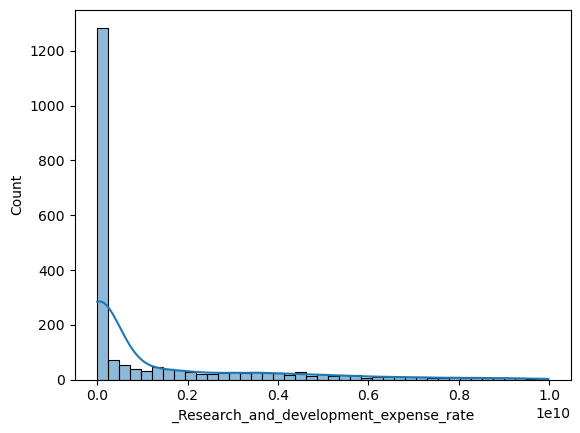

In [41]:
sns.histplot(data=df,x='_Research_and_development_expense_rate',kde=True,);

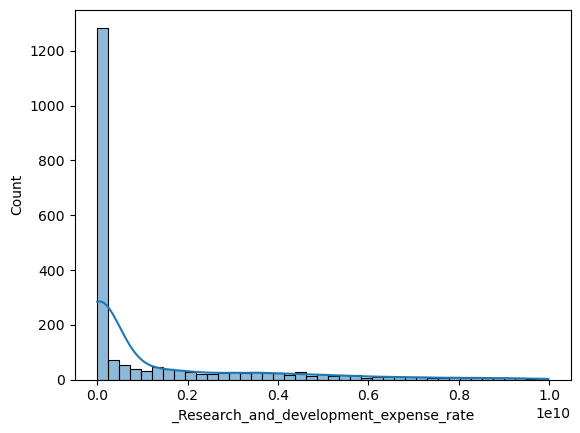

In [42]:
sns.histplot(data=df,x='_Research_and_development_expense_rate',kde=True,);

<AxesSubplot:xlabel='_Cash_flow_rate', ylabel='Count'>

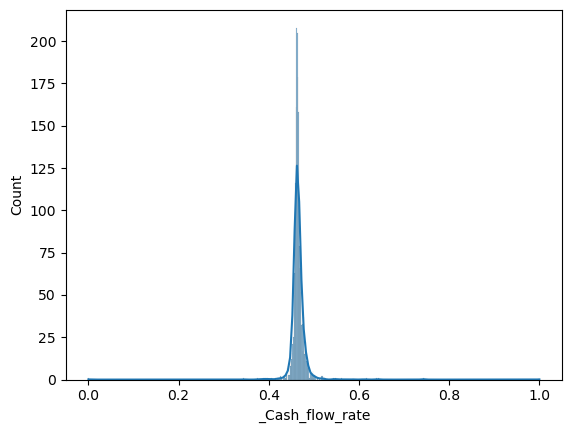

In [43]:
sns.histplot(data=df,x='_Cash_flow_rate',kde=True,)

<AxesSubplot:xlabel='_Cash_Reinvestment_perc', ylabel='Count'>

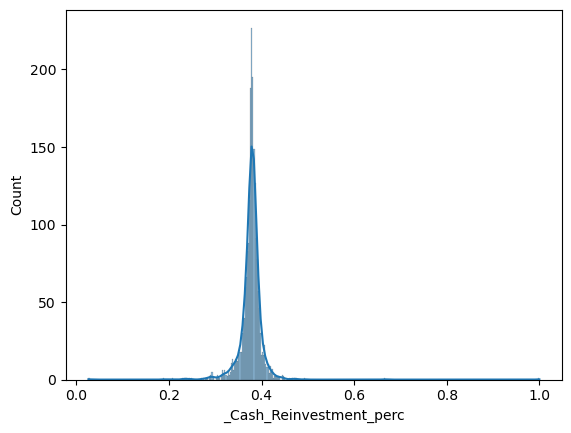

In [44]:
sns.histplot(data=df,x='_Cash_Reinvestment_perc',kde=True,)

<AxesSubplot:xlabel='_Net_profit_before_tax_to_Paid_in_capital', ylabel='Count'>

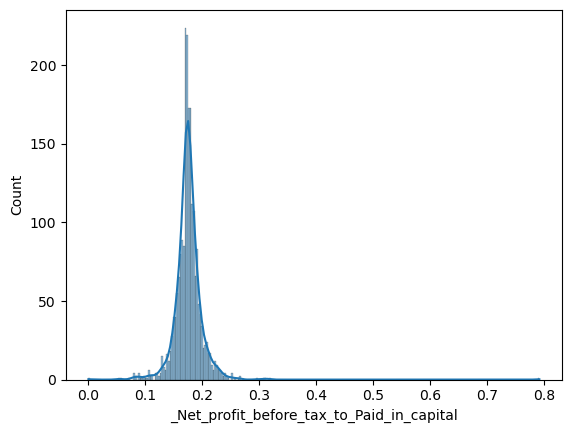

In [45]:
sns.histplot(data=df,x='_Net_profit_before_tax_to_Paid_in_capital',kde=True,)

<AxesSubplot:xlabel='_Total_Asset_Turnover', ylabel='Count'>

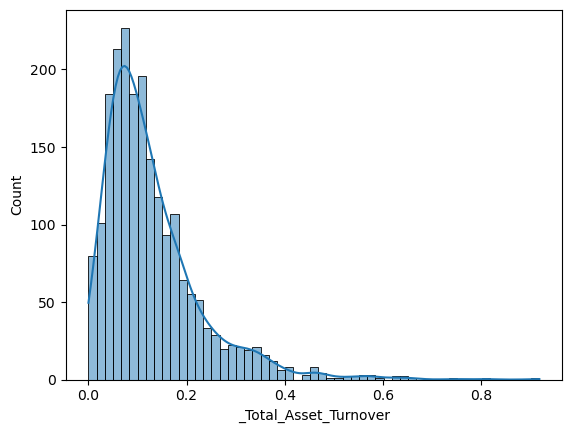

In [46]:
sns.histplot(data=df,x='_Total_Asset_Turnover',kde=True,)

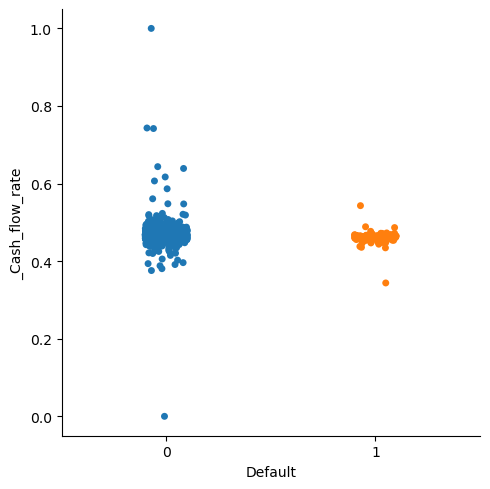

In [47]:
sns.catplot( data=df,x="Default", y="_Cash_flow_rate");

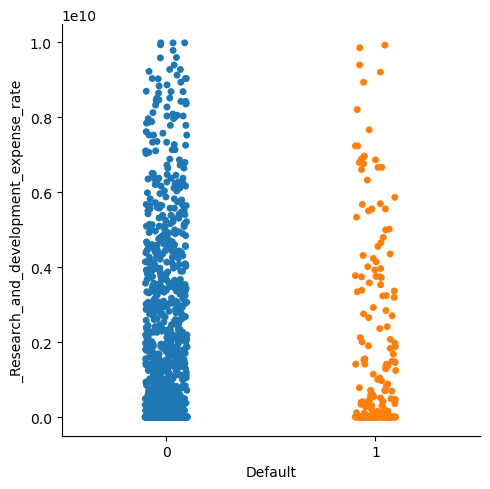

In [48]:
sns.catplot(data=df,x="Default", y="_Research_and_development_expense_rate");

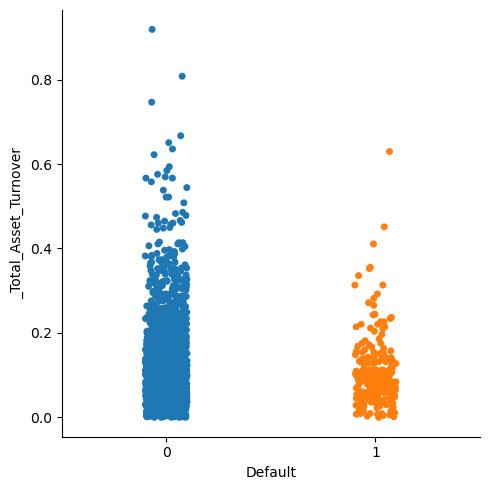

In [49]:
sns.catplot(data=df,x="Default", y="_Total_Asset_Turnover");

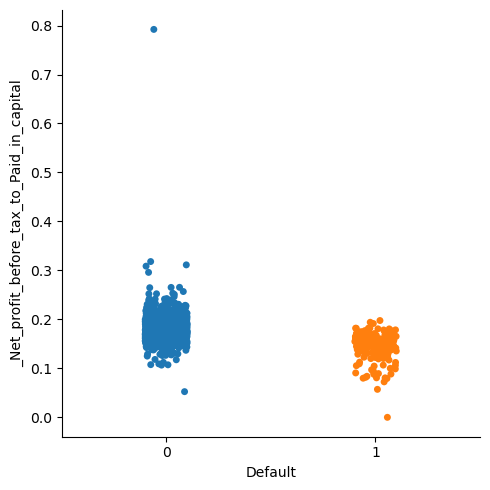

In [50]:
sns.catplot( data=df,x="Default", y="_Net_profit_before_tax_to_Paid_in_capital");

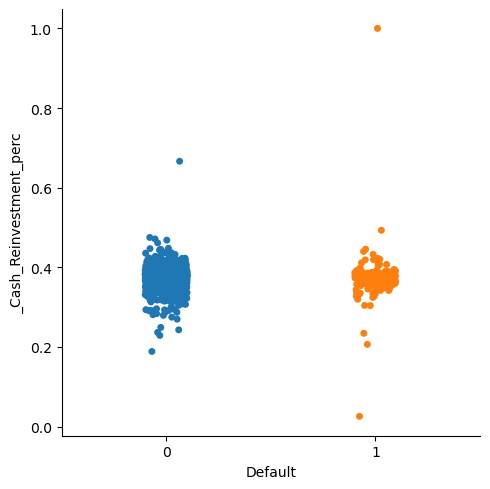

In [51]:
sns.catplot(data=df,x="Default", y="_Cash_Reinvestment_perc");

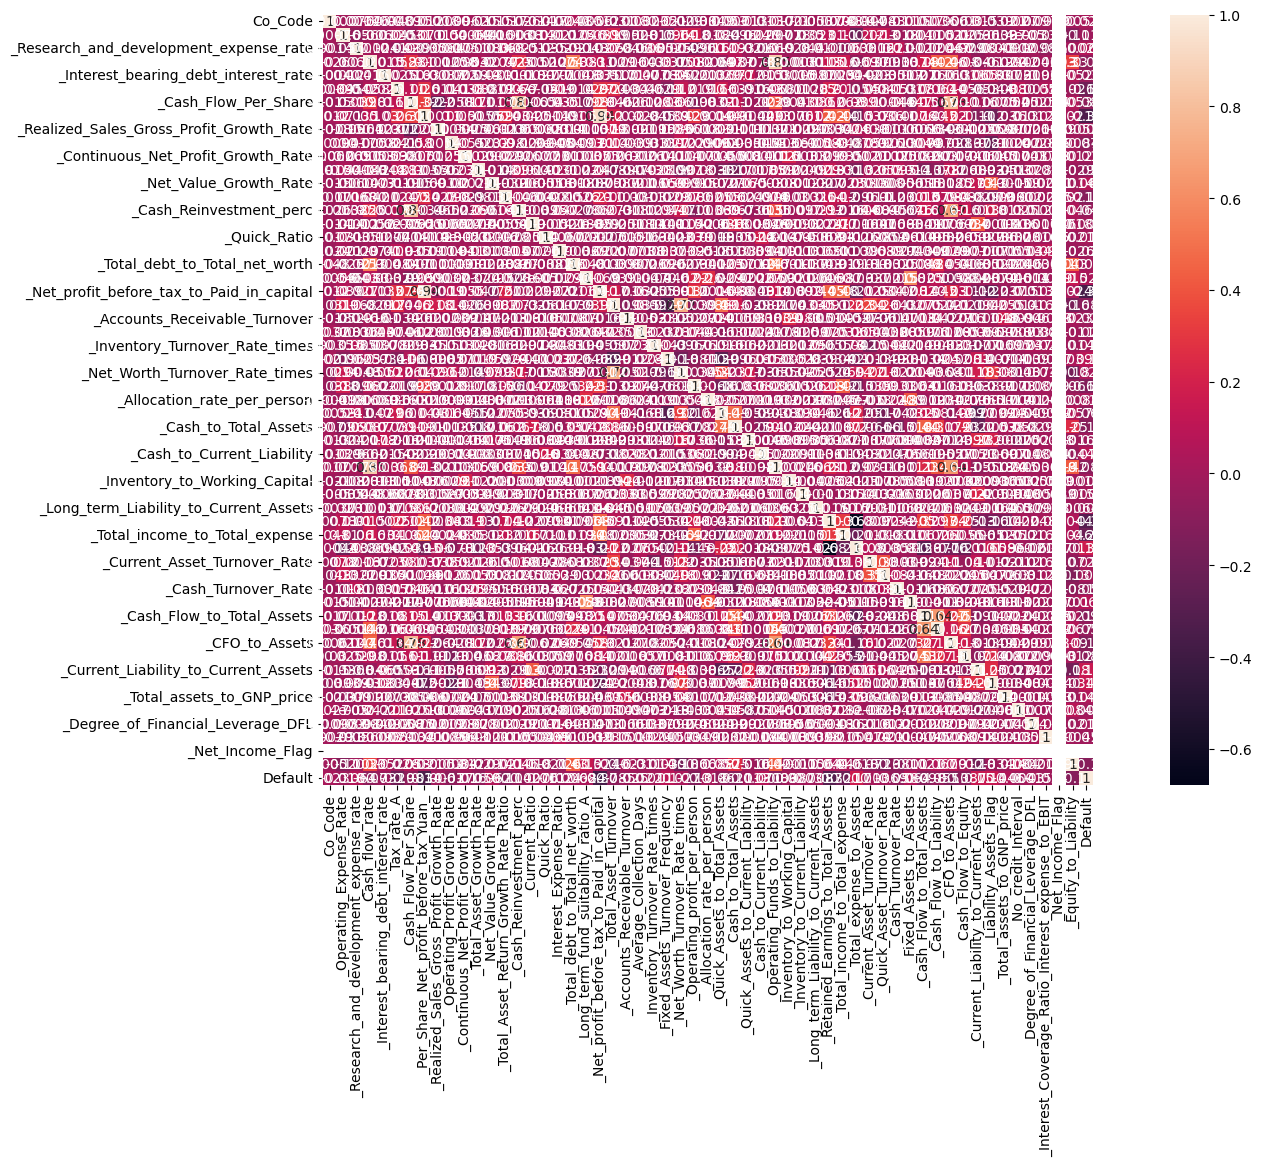

In [52]:
plt.figure(figsize=(20,10)) 
corr=sns.heatmap(df.corr(),annot=True,square=True)
plt.savefig('corr.jpg')

In [53]:
df['Default'].value_counts()

0    1838
1     220
Name: Default, dtype: int64

In [54]:
df['_Liability_Assets_Flag'].value_counts()

0    2051
1       7
Name: _Liability_Assets_Flag, dtype: int64

In [55]:
df['_Net_Income_Flag'].value_counts()

1    2058
Name: _Net_Income_Flag, dtype: int64

Segregating the Predictors and Response

In [56]:
predictors =DF.drop('Default',axis = 1)
response =DF['Default']

In [57]:
# Scale the predictors:

In [58]:
from sklearn.preprocessing import StandardScaler  # Scale train and test separately

scaler = StandardScaler()

scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [59]:
DF = pd.concat([scaled_predictors, response], axis = 1)

In [60]:
DF.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quick_Assets_to

TRAIN-TEST SPLIT

In [61]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(DF, test_size = 0.33,stratify = DF.Default)

In [62]:
from sklearn.impute import KNNImputer

In [63]:
imputer = KNNImputer(n_neighbors = 5)

In [64]:
DF_imputed_train = pd.DataFrame(imputer.fit_transform(Train), columns= Train.columns)
DF_imputed_test = pd.DataFrame(imputer.transform(Test), columns = Test.columns)

In [65]:
print(DF_imputed_train.isnull().sum().sum())
print(DF_imputed_test.isnull().sum().sum())

0
0


<AxesSubplot:>

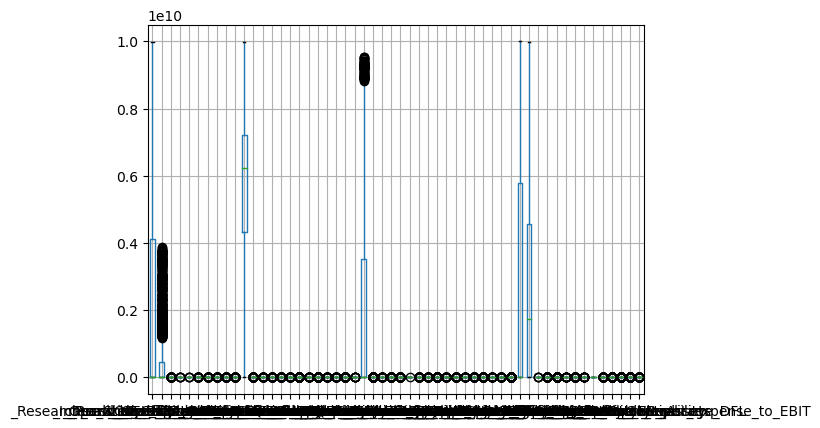

In [66]:
df_X.boxplot()

Partitioning the data into train and test:

In [67]:
x= df.drop(['Default'], axis = 1)
y= df['Default']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.33, random_state = 42, stratify = y)

In [69]:
print(x_train.shape)
print(x_test.shape)

(1378, 57)
(680, 57)


In [70]:
print(y_train.value_counts(normalize =True).round(2))
print(' ')
print(y_test.value_counts(normalize =True).round(2))

0    0.89
1    0.11
Name: Default, dtype: float64
 
0    0.89
1    0.11
Name: Default, dtype: float64


Inspect possible correlations between independent variables

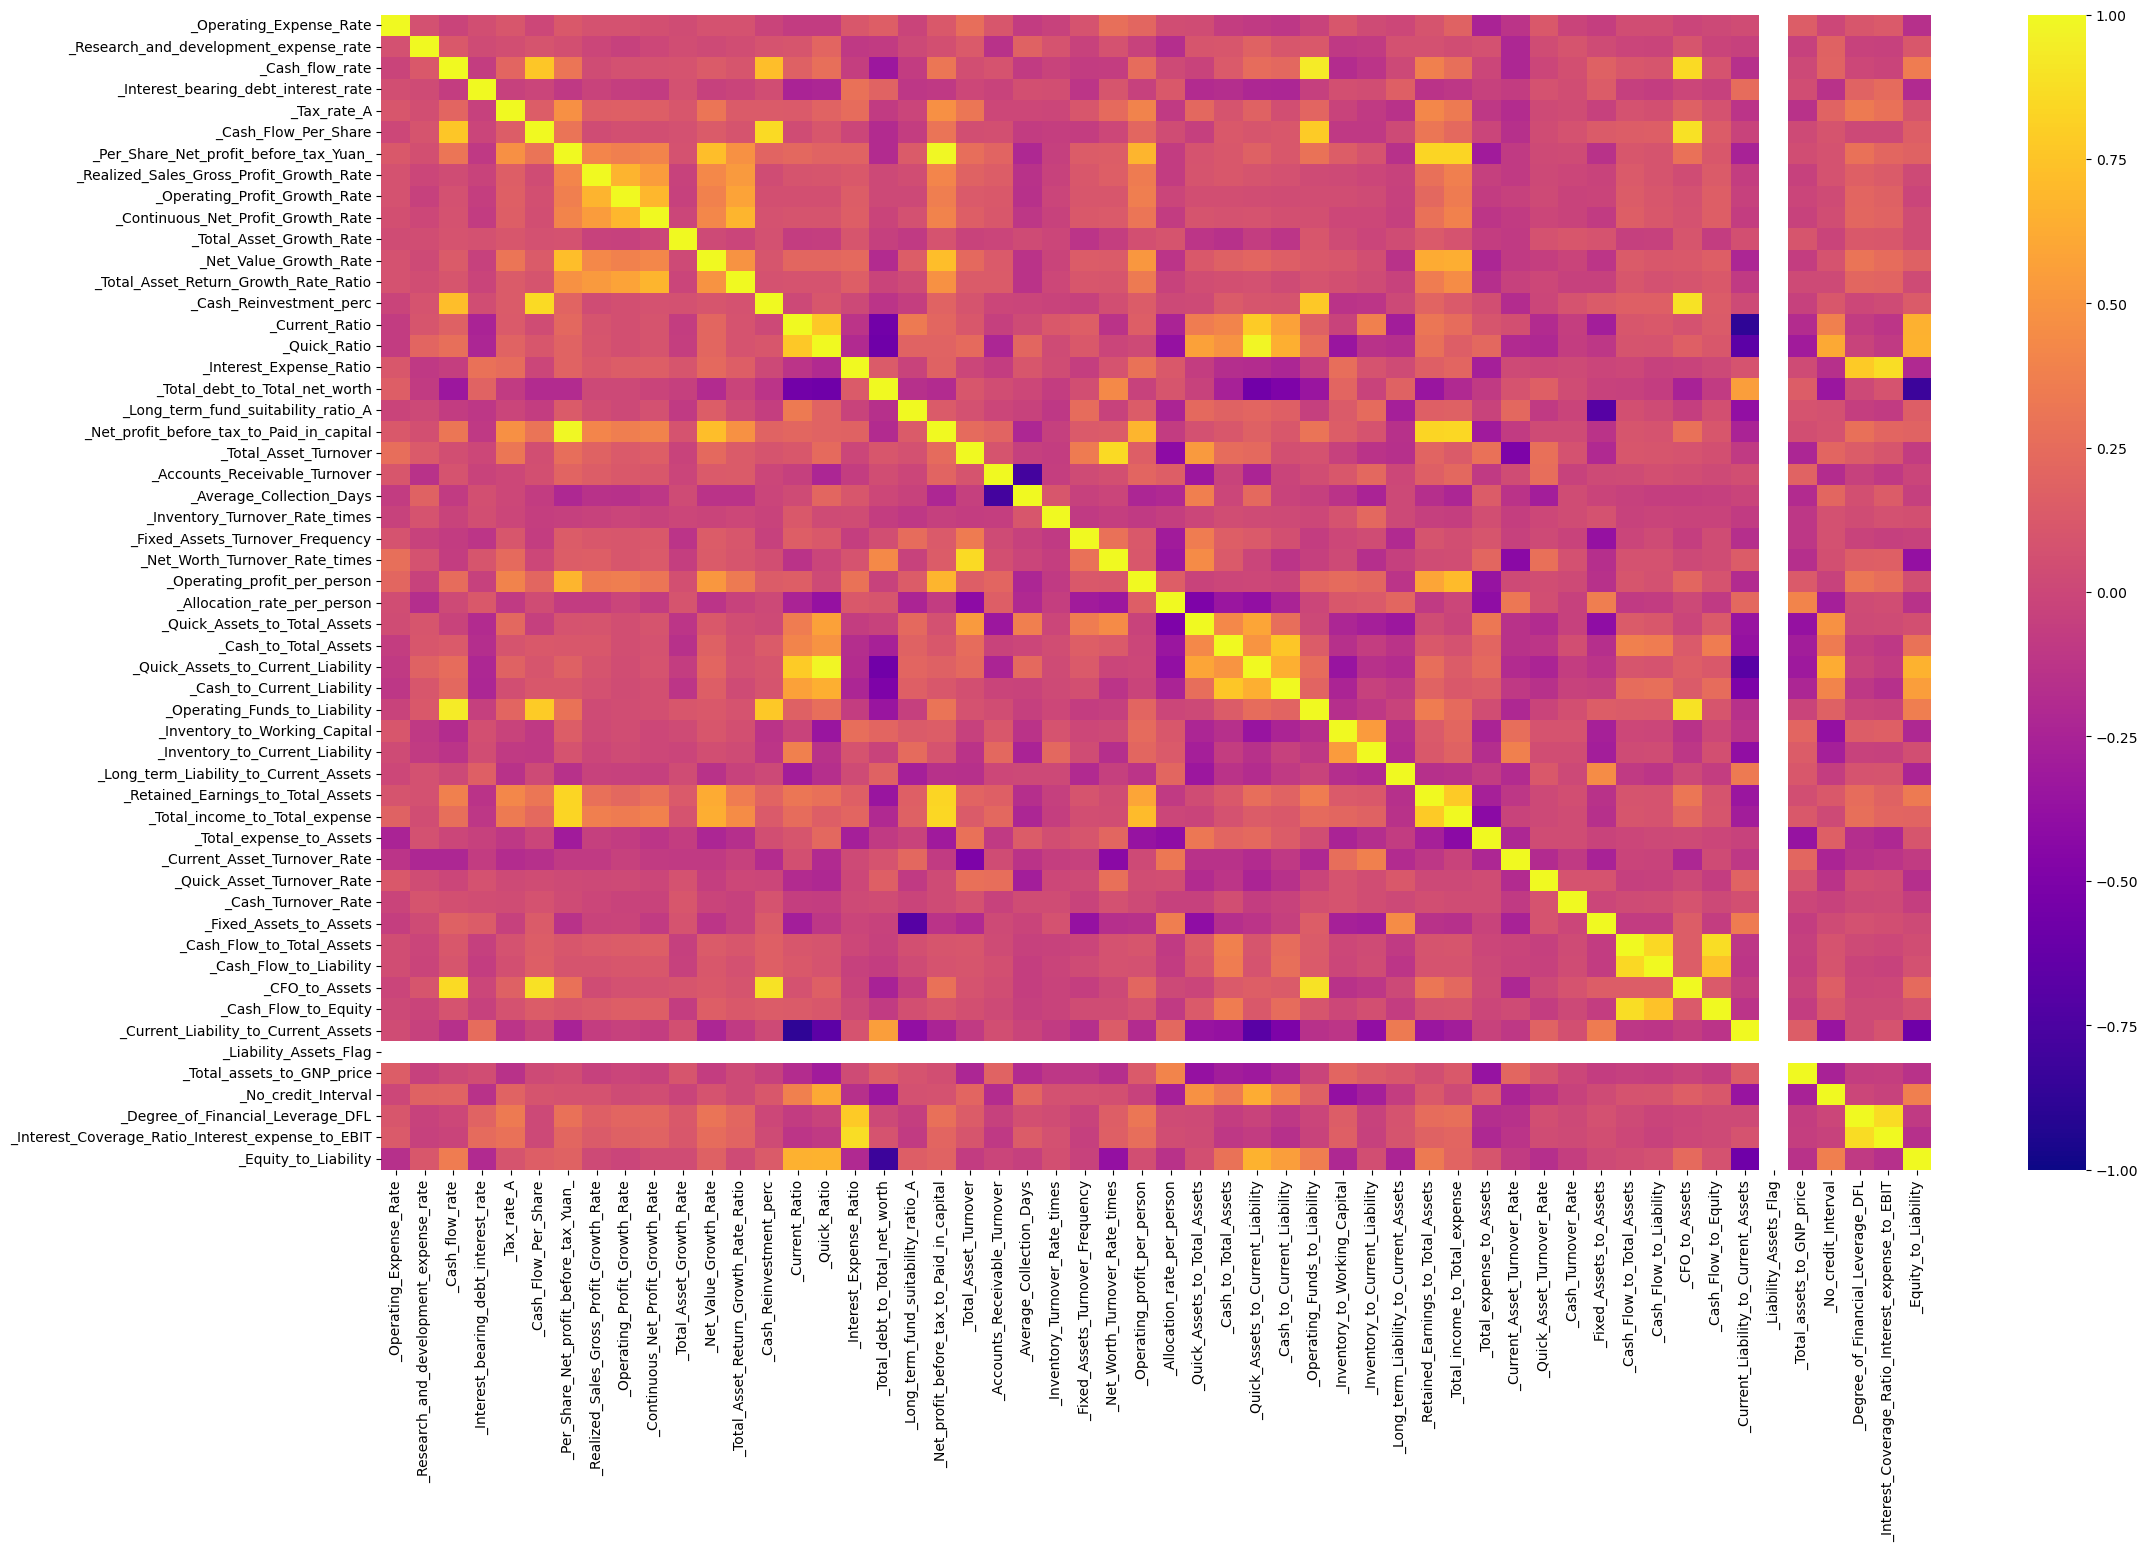

In [71]:
plt.figure(figsize = (25,15))
cor_matrix = DF_imputed_train.drop('Default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap= 'plasma', vmin = -1, vmax= 1);

In [72]:
x_train = DF_imputed_train.drop('Default', axis = 1)
y_train = DF_imputed_train['Default']
x_test = DF_imputed_test.drop('Default', axis = 1)
y_test = DF_imputed_test['Default']

In [73]:
import statsmodels.formula as SM
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [74]:
LogR = LogisticRegression()

In [75]:
selector = RFE(estimator = LogR, n_features_to_select=19, step=1)

In [76]:
selector = selector.fit(x_train, y_train)

In [77]:
selector.ranking_

array([ 9,  1, 11,  1,  6, 15,  1, 31, 18, 17, 24, 12, 16, 30, 23,  1,  7,
        1, 28, 29,  1,  1, 13, 26,  5,  1,  1,  1, 21, 10,  1,  3,  1,  1,
       22, 27, 25,  1,  1,  1, 20,  1,  2, 34,  4,  1, 32, 33, 36, 35,  8,
       19, 14,  1])

In [78]:
selector.n_features_

19

In [79]:
DF_1 = pd.DataFrame({'Features': scaled_predictors.columns, 'Rank': selector.ranking_})
DF_1[['Rank'] == 1]

KeyError: False

Validating the model on train and test set

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
pred_train = selector.predict(x_train)
pred_test = selector.predict(x_test)

In [84]:
print(confusion_matrix(y_train, pred_train))

[[1201   30]
 [  82   65]]


In [85]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1231
         1.0       0.68      0.44      0.54       147

    accuracy                           0.92      1378
   macro avg       0.81      0.71      0.75      1378
weighted avg       0.91      0.92      0.91      1378



In [86]:
print(confusion_matrix(y_test, pred_test))

[[588  19]
 [ 46  27]]


In [87]:
print( classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       607
         1.0       0.59      0.37      0.45        73

    accuracy                           0.90       680
   macro avg       0.76      0.67      0.70       680
weighted avg       0.89      0.90      0.89       680



In [88]:
!pip install imblearn

In [89]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy = .75)
x_res, y_res = sm.fit_resample(x_train, y_train)

In [90]:
selector_smote = selector.fit(x_res, y_res)

In [91]:
selector_smote.n_features_

19

In [92]:
pred_train_smote = selector_smote.predict(x_res)
pred_test_smote = selector_smote.predict(x_test)

In [93]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87      1231
         1.0       0.81      0.84      0.83       923

    accuracy                           0.85      2154
   macro avg       0.84      0.85      0.85      2154
weighted avg       0.85      0.85      0.85      2154



In [94]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.91       607
         1.0       0.41      0.82      0.55        73

    accuracy                           0.86       680
   macro avg       0.69      0.84      0.73       680
weighted avg       0.92      0.86      0.88       680



In [95]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy = .8)
x_res, y_res = sm.fit_resample(x_train, y_train)

In [96]:
selector_smote = selector.fit(x_res, y_res)

In [97]:
selector_smote.n_features_

19

In [98]:
pred_train_smote = selector_smote.predict(x_res)
pred_test_smote = selector_smote.predict(x_test)

In [99]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1231
         1.0       0.82      0.87      0.84       984

    accuracy                           0.86      2215
   macro avg       0.85      0.86      0.85      2215
weighted avg       0.86      0.86      0.86      2215



In [100]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.92       607
         1.0       0.45      0.84      0.58        73

    accuracy                           0.87       680
   macro avg       0.71      0.86      0.75       680
weighted avg       0.92      0.87      0.89       680

